<a href="https://colab.research.google.com/github/alvarogutyerrez/alvarogutyerrez/blob/master/S09_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUPPORT VECTOR MACHINE

##SUPPORT VECTOR CLASSIFIER



In [0]:
from __future__ import division
# -*- coding: utf-8 -*-
"""
Preliminares
@author: Álvaro Gutiérrez
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split

!wget https://www.dropbox.com/s/82dl9cn3p59bxuv/data_with_economic_stage.txt
!wget https://www.dropbox.com/s/xt6tsxqnz13rgzs/prediccion_quiebra.xlsx  
!pip install xlrd

In [0]:
data=pd.read_excel('prediccion_quiebra.xlsx',sep='\t').dropna()
y=data['Q1_NQ_0']
x=data.iloc[:,2:-1]
y.describe()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50 , random_state=777)


svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=0.001, loss="hinge",penalty='l2'))
])


svm_clf.fit(x_train, y_train)
y_pred_tr=svm_clf.predict(x_train)
y_pred_tst=svm_clf.predict(x_test)



##Métricas de Acierto

### Recall

In [35]:

r_tr=metrics.recall_score(y_train,y_pred_tr,average=None).reshape(2,1)
r_tst=metrics.recall_score(y_test,y_pred_tst,average=None).reshape(2,1)
columnas = ['Clase0' , 'Clase1']
eje = {'Training','Testing'}
recall = pd.DataFrame(np.concatenate((r_tr,r_tst), axis = 1), columns = columnas, index =eje )
recall

,Clase0,Clase1
Training,0.763889,0.661290
Testing,0.750000,0.652174


### Precisión

In [36]:
p_tr=metrics.precision_score(y_train,y_pred_tr,average=None).reshape(2,1)
p_tst=metrics.precision_score(y_test,y_pred_tst,average=None).reshape(2,1)
columnas = ['Clase0' , 'Clase1']
eje = {'Training','Testing'}
precision = pd.DataFrame(np.concatenate((p_tr,p_tst), axis = 1), columns = columnas, index =eje )
precision


,Clase0,Clase1
Training,0.859375,0.719298
Testing,0.613636,0.588235


##Búsqueda Iterativa de Hiperparámetros

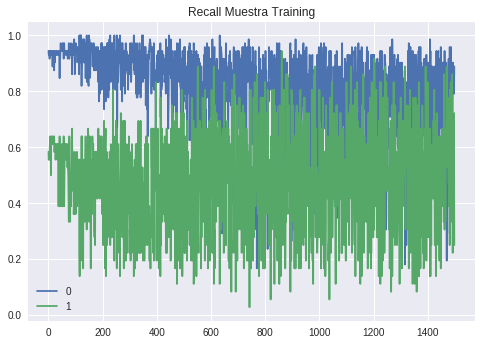

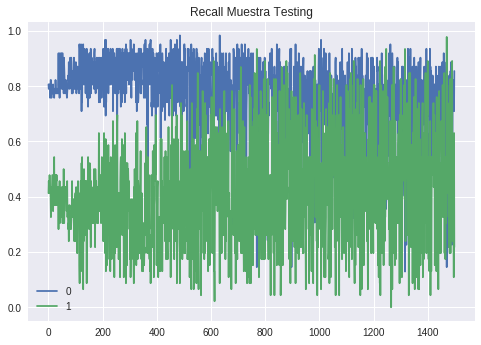

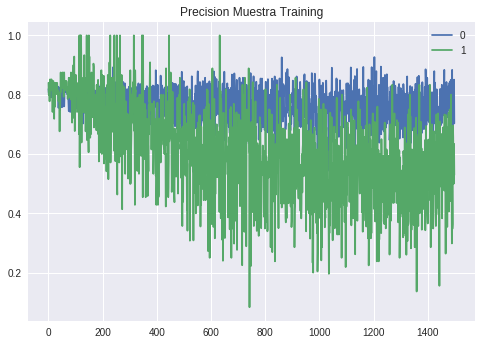

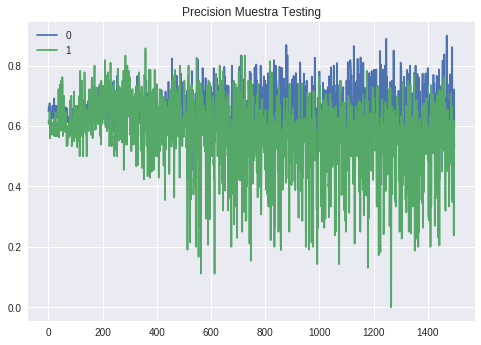

In [37]:
'''GRILLA'''

trials=1500
recalls_tr=[]
precisions_tr=[]

recalls_tst=[]
precisions_tst=[]




for trial in range(1,trials):
    #print("trial number ", trial)

    """entrenamiento y prueba """
    
    
    svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=trial, loss="hinge",penalty='l2'))
    ])

    svm_clf.fit(x_train, y_train)
    y_pred_tr=svm_clf.predict(x_train)
    y_pred_tst=svm_clf.predict(x_test)

    '''METRICAS MUESTRA TRAINING '''    
    r_tr=metrics.recall_score(y_train,y_pred_tr,average=None)
    p_tr=metrics.precision_score(y_train,y_pred_tr,average=None)
    
    recalls_tr.append(r_tr)
    precisions_tr.append(p_tr)
    
    '''METRICAS MUESTRA TESTING '''
    r_tst=metrics.recall_score(y_test,y_pred_tst,average=None)
    p_tst=metrics.precision_score(y_test,y_pred_tst,average=None)
    
    recalls_tst.append(r_tst)
    precisions_tst.append(p_tst)
 
recalls_tr_pd=pd.DataFrame(recalls_tr)
recalls_tr_pd.plot(title = 'Recall Muestra Training')
recalls_tst_pd=pd.DataFrame(recalls_tst)
recalls_tst_pd.plot(title = 'Recall Muestra Testing')

precisions_tr_pd=pd.DataFrame(precisions_tr)
precisions_tr_pd.plot(title = 'Precision Muestra Training')
precisions_tst_pd=pd.DataFrame(precisions_tst)
precisions_tst_pd.plot(title = 'Precision Muestra Testing')

##SUPPORT VECTOR REGRESSION

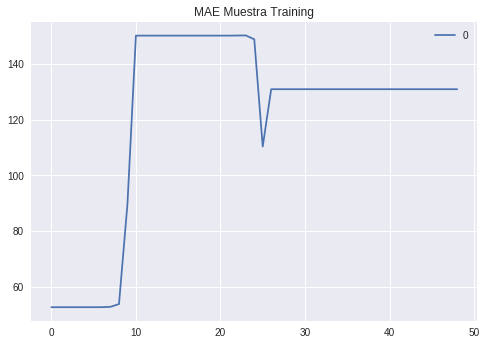

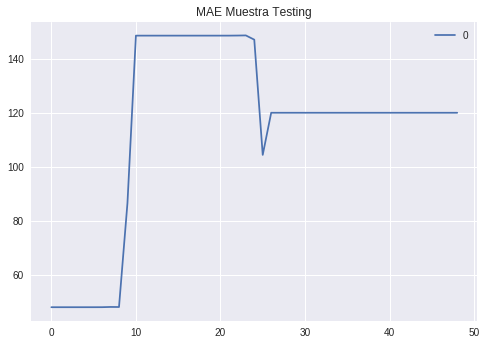

In [43]:

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error



data=pd.read_csv('data_with_economic_stage.txt',sep='\t')
y=data['LME COPPER SPOT ($)  OFF']
x=data.iloc[:,3:-4]


mae_tr_SVR=[]
mae_tst_SVR=[]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50 , random_state=777)


c=0.000001
lista_c=[]
portencia = 10
for potencia in range(1,50):
    a=c*10**potencia
    lista_c.append(a)


for trial in lista_c:
    #print("trial number ", trial)

    """entrenamiento y prueba """
    svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_reg", SVR(kernel='poly', C=10, degree=2 , epsilon=trial*0.01))
    ])

    svm_reg.fit(x_train, y_train)
    y_pred_tr=svm_reg.predict(x_train)
    y_pred_tst=svm_reg.predict(x_test)

    '''METRICAS MUESTRA TRAINING '''    
    mae_tr=metrics.mean_absolute_error(y_train,y_pred_tr)    
    mae_tr_SVR.append(mae_tr)
    
    '''METRICAS MUESTRA TESTING '''
    mae_tst=metrics.mean_absolute_error(y_test,y_pred_tst)    
    mae_tst_SVR.append(mae_tst)
    
    
recalls_tr_pd_SVR=pd.DataFrame(mae_tr_SVR)
recalls_tr_pd_SVR.plot(title = 'MAE Muestra Training')


recalls_tst_pd_SVR=pd.DataFrame(mae_tst_SVR)
recalls_tst_pd_SVR.plot(title = 'MAE Muestra Testing')